In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [73]:
df_housedata=pd.read_csv('kc_house_data.csv')

In [74]:
df_housedata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [75]:
# a few of the above column names seem to be important to follow:
# price, bedrooms, bathrooms, sqft_living, sqft_lot, floors
# waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built
# yr_renovated, zipcode

In [76]:
# descriptive statistics summary
# use the max value to determine the max value on plots
df_housedata['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

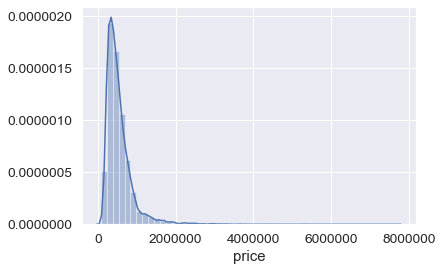

In [77]:
# get understanding of how the 'price' variable is distributed
# 'price' histogram raw data
sns.distplot(df_housedata['price'])

In [78]:
# 'price' definitely not a normal distribution
# calculate skewness and kurtosis
print("Skewness: %f" % df_housedata['price'].skew())
print("Kurtosis: %f" % df_housedata['price'].kurt())

Skewness: 4.023365
Kurtosis: 34.541359


In [79]:
# the kurtosis value is super high, indicates 
# a skewed distribution that does not follow standard curve patterns
# normal kurtosis should be around 3
# the skewness is > 0, indicating skewness leaning towards one direction

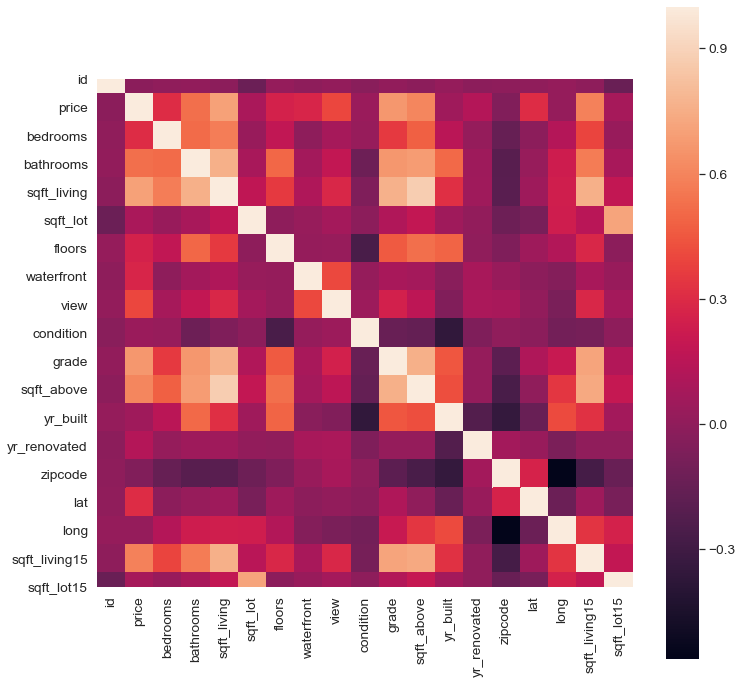

In [80]:
# correlation matrix
corrmat=df_housedata.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,vmax=1.0,square=True)

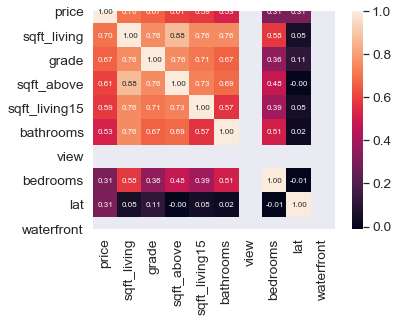

In [81]:
# price correlation matrix
k=10
cols=corrmat.nlargest(k,'price')['price'].index
cm=np.corrcoef(df_housedata[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,
              fmt='.2f',annot_kws={'size':8},yticklabels=cols.values,
              xticklabels=cols.values)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


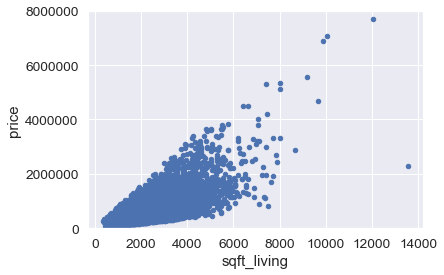

In [82]:
# scatterplot sqft_living/price
var='sqft_living'
data=pd.concat([df_housedata['price'], df_housedata[var]],axis=1)
data.plot.scatter(x=var, y='price',ylim=(0,8000000));

In [83]:
# results look like linear relationship (conical)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


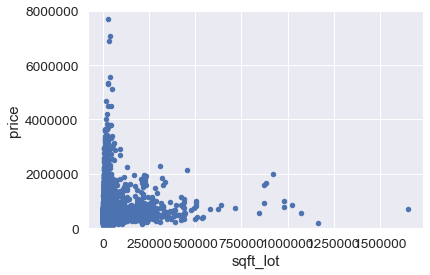

In [84]:
# scatterplot sqft_lot/price
sqft_lot='sqft_lot'
data=pd.concat([df_housedata['price'], df_housedata[sqft_lot]],axis=1)
data.plot.scatter(x=sqft_lot, y='price',ylim=(0,8000000));

In [85]:
# sqft_lot does not seem to be reported for all homes, use sqft_living instead

In [86]:
df_housedata['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2250.0        1
1920.0        1
475.0         1
1275.0        1
2050.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [ ]:
# need to remove '?' from sqft_basement

In [87]:
df_housedata['sqft_basement'] = df_housedata['sqft_basement'].replace('?',0)

In [88]:
df_housedata['sqft_basement'].value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
1135.0        1
1275.0        1
2130.0        1
20.0          1
143.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [89]:
df_housedata['sqft_basement']=df_housedata['sqft_basement'].astype(float)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


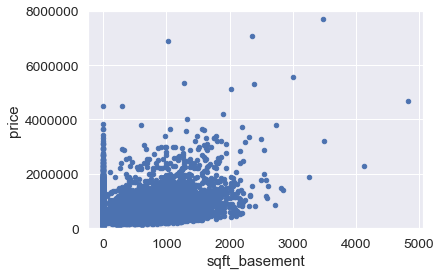

In [91]:
# scatterplot sqft_basement/price
sqft_bsmt='sqft_basement'
data=pd.concat([df_housedata['price'], df_housedata[sqft_bsmt]],axis=1)
data.plot.scatter(x=sqft_bsmt, y='price',ylim=(0,8000000));

In [94]:
# what is the data structure of 'condition'
df_housedata['condition'].describe()

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

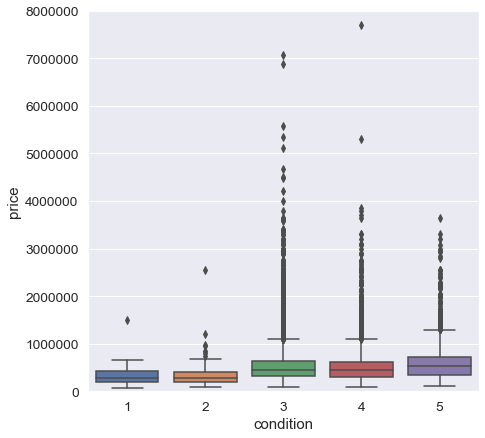

In [95]:
# boxplot condition/price
condition='condition'
data=pd.concat([df_housedata['price'], df_housedata[condition]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=condition, y='price', data=data)
fig.axis(ymin=0, ymax=8000000);

In [96]:
# condition doesn't really seem to have any correlation with price

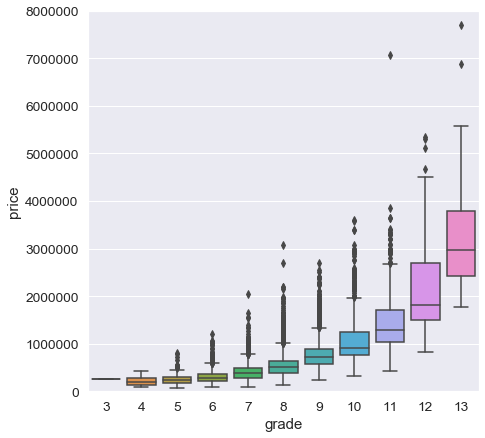

In [97]:
# boxplot grade/price
grade='grade'
data=pd.concat([df_housedata['price'], df_housedata[grade]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=grade, y='price', data=data)
fig.axis(ymin=0, ymax=8000000);

In [98]:
# grade definitely has a relationship with price
# increasing grade with increasing price

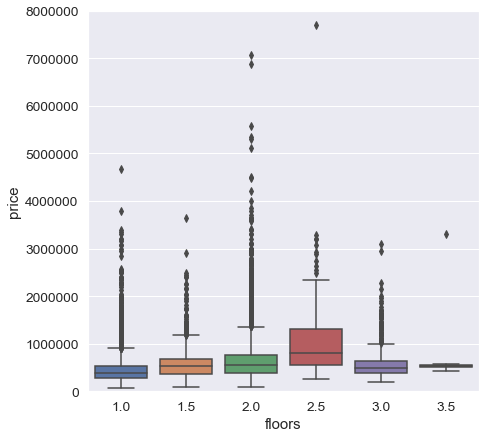

In [99]:
# boxplot floors/price
floors='floors'
data=pd.concat([df_housedata['price'], df_housedata[floors]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=floors, y='price', data=data)
fig.axis(ymin=0, ymax=8000000);

In [100]:
# floors does not seem to show much of a relationship
# although at first it looks like increase in price as rooms increase
# until there are > 2.5 rooms, then price decreases again

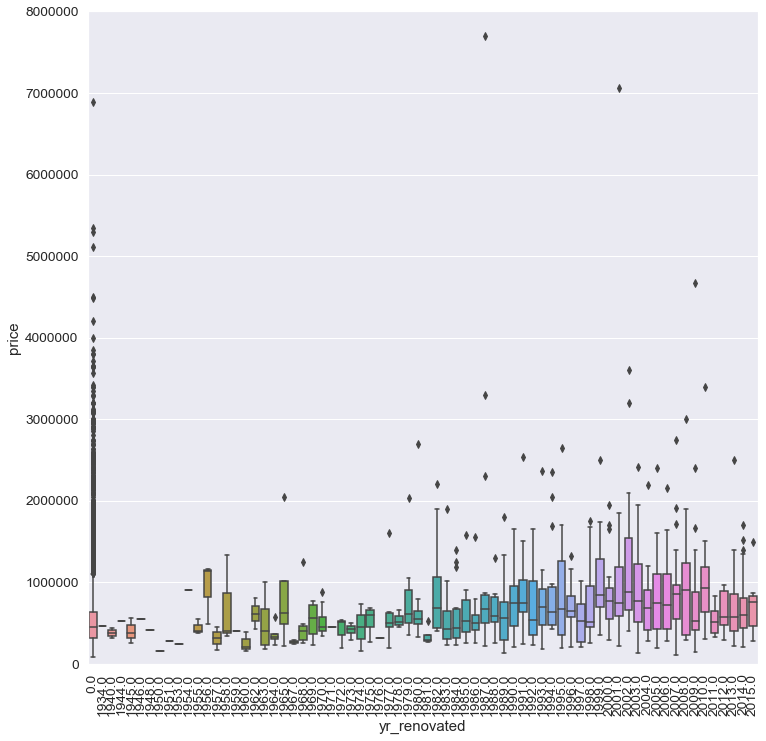

In [101]:
# boxplot yr_renovated/price
yr_renovated='yr_renovated'
data=pd.concat([df_housedata['price'], df_housedata[yr_renovated]], axis=1)
f, ax = plt.subplots(figsize=(12,12))
fig = sns.boxplot(x=yr_renovated, y='price', data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=8000000);

In [102]:
# with more recent renovation, price seems to increase

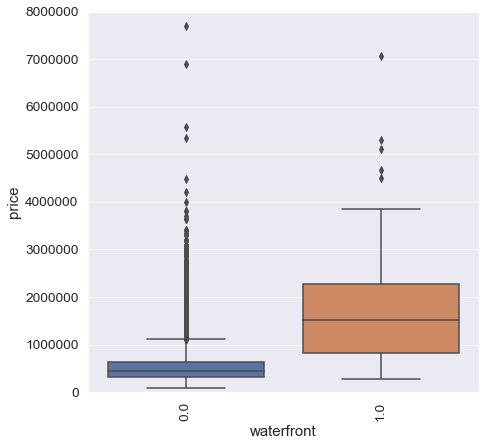

In [103]:
# boxplot waterfront/price
waterfront='waterfront'
data=pd.concat([df_housedata['price'], df_housedata[waterfront]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=waterfront, y='price', data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=8000000);

In [105]:
# waterfront yes/no seems to correlate with increased price but there is considerable overlap

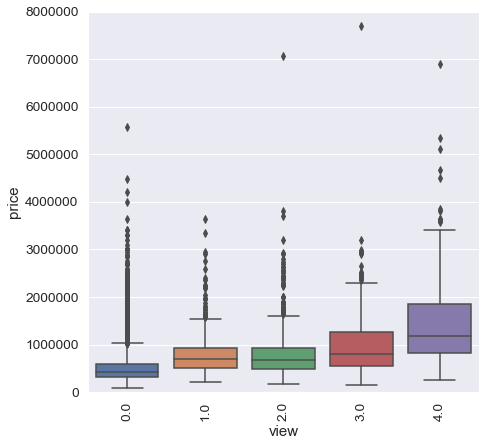

In [106]:
# boxplot view/price
view='view'
data=pd.concat([df_housedata['price'], df_housedata[view]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=view, y='price', data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=8000000);

In [107]:
df_housedata['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [108]:
# view is not a yes/no value, so I don't know what this data is based on

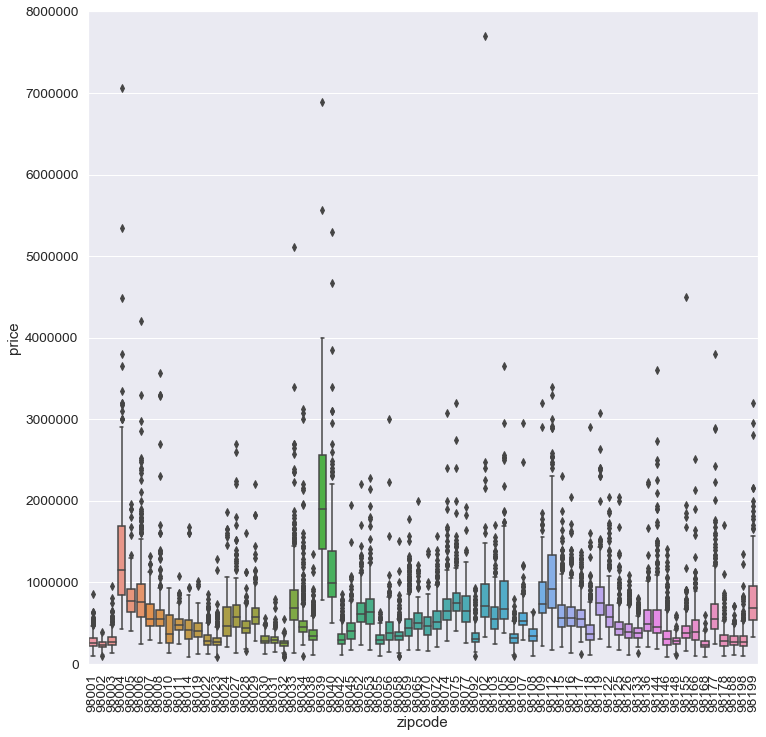

In [109]:
# boxplot zipcode/price
zipcode='zipcode'
data=pd.concat([df_housedata['price'], df_housedata[zipcode]], axis=1)
f, ax = plt.subplots(figsize=(12,12))
fig = sns.boxplot(x=zipcode, y='price', data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=8000000);

In [33]:
# specific zip codes seem to have more expensive houses, obviously, look into 98039

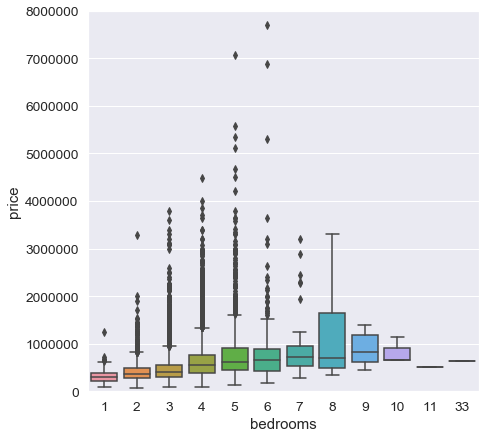

In [110]:
# boxplot bedrooms/price
bedrooms='bedrooms'
data=pd.concat([df_housedata['price'], df_housedata[bedrooms]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=bedrooms, y='price', data=data)
fig.axis(ymin=0, ymax=8000000);

In [111]:
# clear correlation with # of bedrooms and price

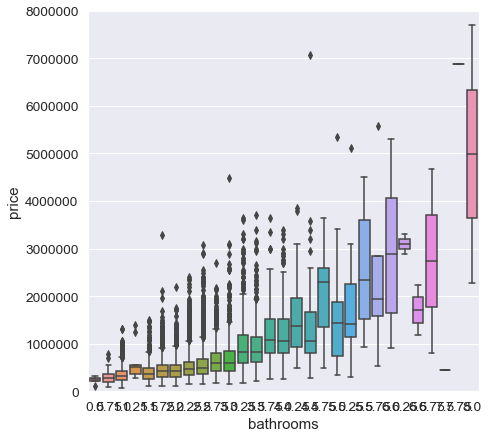

In [112]:
# boxplot bathrooms/price
bathrooms='bathrooms'
data=pd.concat([df_housedata['price'], df_housedata[bathrooms]], axis=1)
f, ax = plt.subplots(figsize=(7,7))
fig = sns.boxplot(x=bathrooms, y='price', data=data)
fig.axis(ymin=0, ymax=8000000);

In [113]:
# clear correlation with # of bathrooms and price

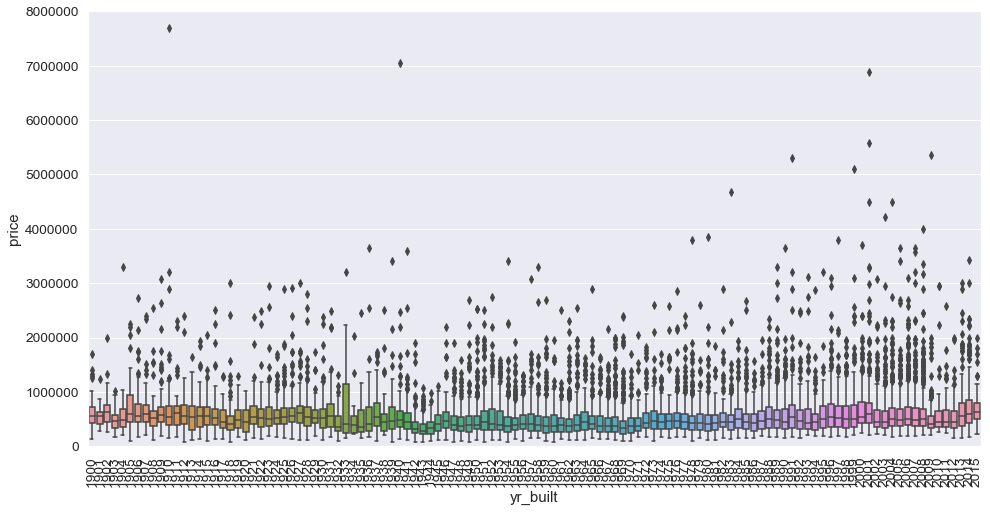

In [114]:
# boxplot yr_built/price
yr_built='yr_built'
data=pd.concat([df_housedata['price'], df_housedata[yr_built]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=yr_built, y='price', data=data)
fig.axis(ymin=0, ymax=8000000)
plt.xticks(rotation=90);

In [115]:
# no correlation between yr_built and price, surprisingly

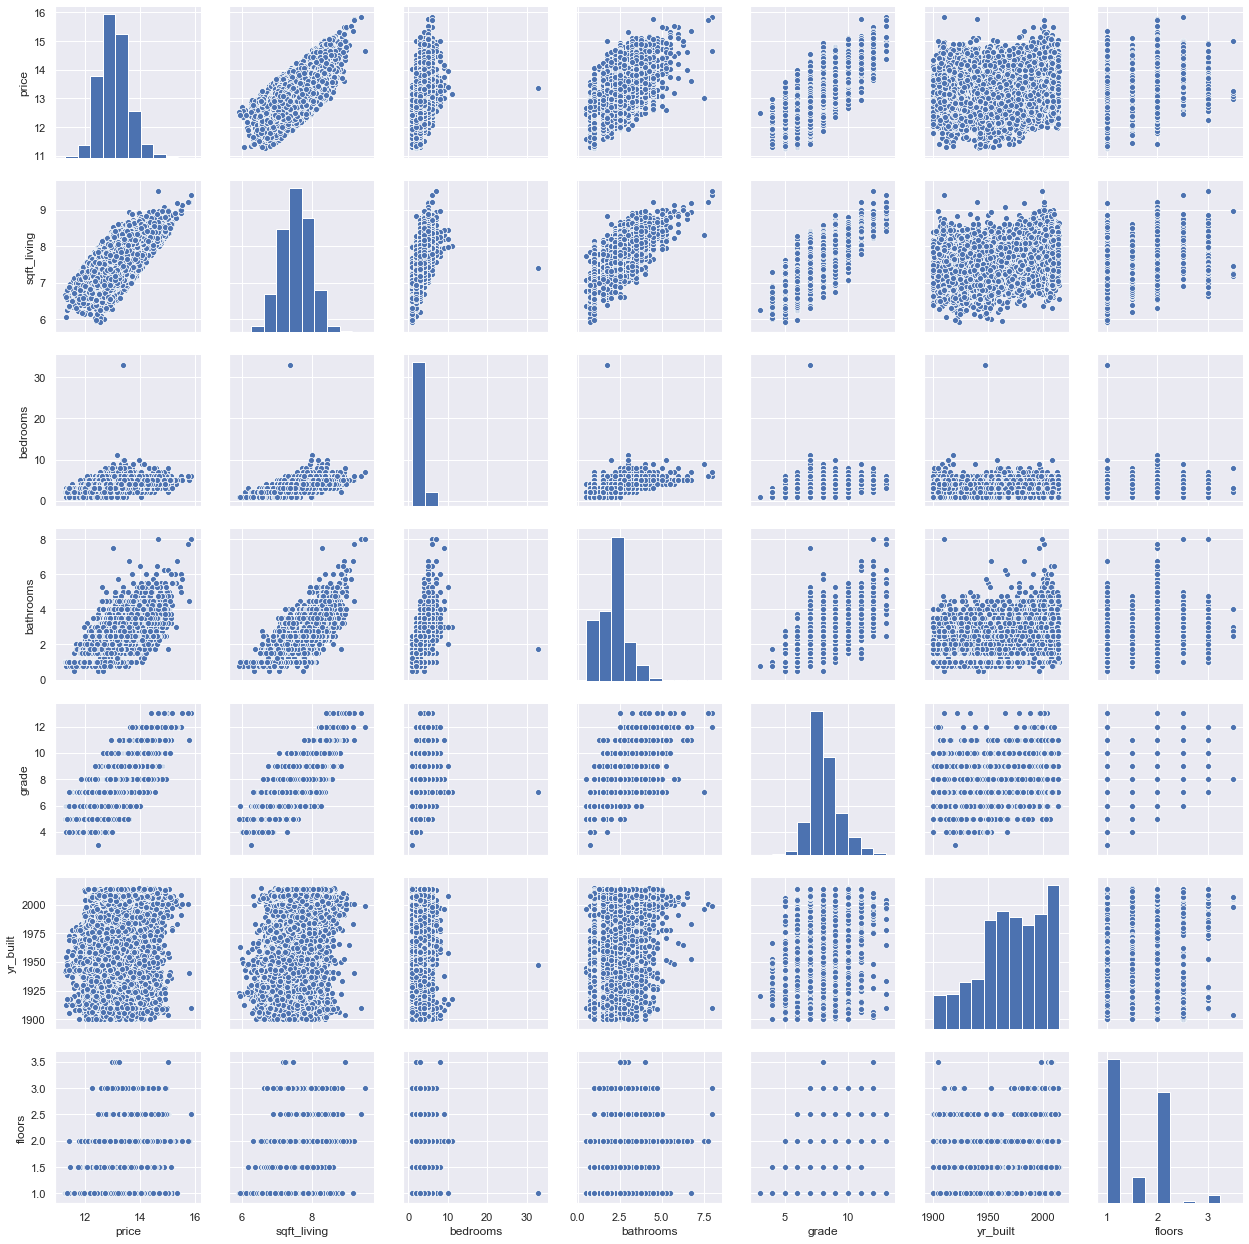

In [60]:
sns.set()
cols=['price','sqft_living','bedrooms','bathrooms', 'grade', 'yr_built','floors']
sns.pairplot(df_housedata[cols],size=2.5)
plt.show()

In [117]:
# note that sqft_living, bedrooms, bathrooms, floors, and grade all correlate with price
# yr_built does not seem to show any relationship with price

In [118]:
# missing data
total=df_housedata.isnull().sum().sort_values(ascending=False)
percent=(df_housedata.isnull().sum()/df_housedata.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
sqft_lot15,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000


In [119]:
# not more than 15% of any parameter missing, not missing any important data

In [120]:
# standardizing data
price_scaled=StandardScaler().fit_transform(df_housedata['price'][:,np.newaxis]);
low_range=price_scaled[price_scaled[:,0].argsort()][:10]
high_range=price_scaled[price_scaled[:,0].argsort()][-10:]
print('outerrange(low) of the distribution:')
print(low_range)
print('\nouterrange(high) of the distribution:')
print(high_range)

outerrange(low) of the distribution:
[[-1.25843051]
 [-1.25298626]
 [-1.25026413]
 [-1.247542  ]
 [-1.24618094]
 [-1.24481987]
 [-1.24209774]
 [-1.23937562]
 [-1.23937562]
 [-1.23529242]]

outerrange(high) of the distribution:
[[10.75159884]
 [10.77882013]
 [11.24158191]
 [12.43931829]
 [12.95652264]
 [13.09262905]
 [13.69149724]
 [17.28470638]
 [17.74746817]
 [19.48963018]]


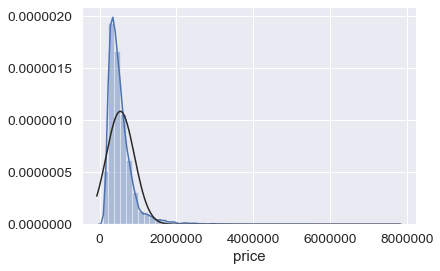

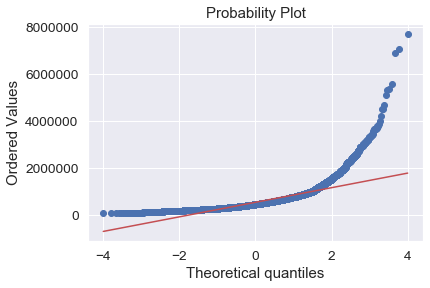

In [121]:
# histogram and probability plot
sns.distplot(df_housedata['price'],fit=norm);
fig=plt.figure()
res=stats.probplot(df_housedata['price'],plot=plt)

In [122]:
# apply log transformation
df_housedata['price']=np.log(df_housedata['price'])

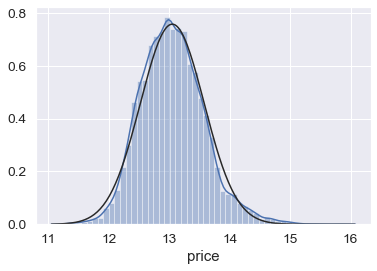

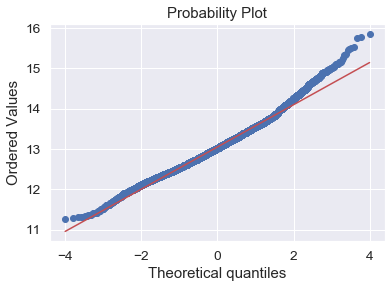

In [123]:
# transformed histogram and normal probability plot
sns.distplot(df_housedata['price'],fit=norm);
fig=plt.figure()
res=stats.probplot(df_housedata['price'],plot=plt)

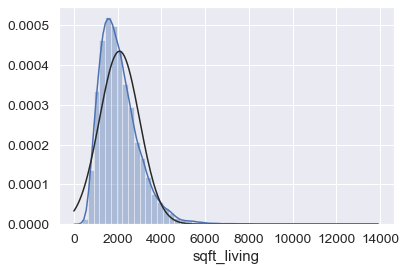

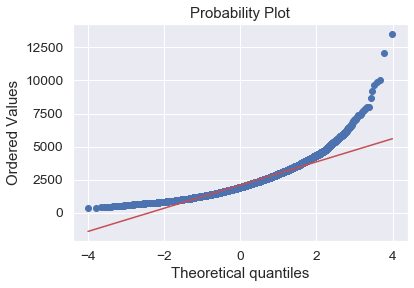

In [124]:
# histogram and normal probability plot for sqft_living
sns.distplot(df_housedata['sqft_living'],fit=norm);
fig=plt.figure()
res=stats.probplot(df_housedata['sqft_living'],plot=plt)

In [125]:
# apply log transformation
df_housedata['sqft_living']=np.log(df_housedata['sqft_living'])

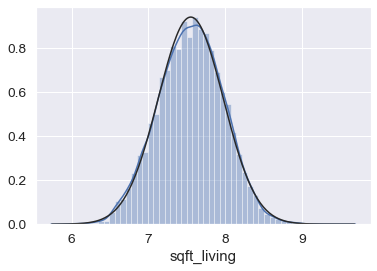

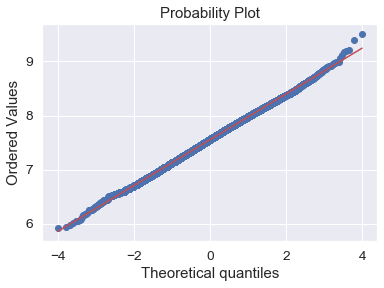

In [126]:
# histogram and normal probability plot for sqft_living
sns.distplot(df_housedata['sqft_living'],fit=norm);
fig=plt.figure()
res=stats.probplot(df_housedata['sqft_living'],plot=plt)

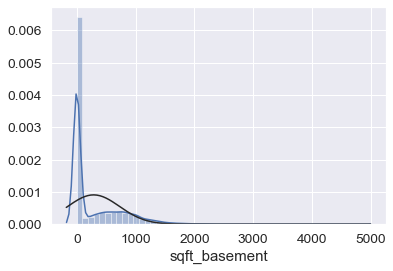

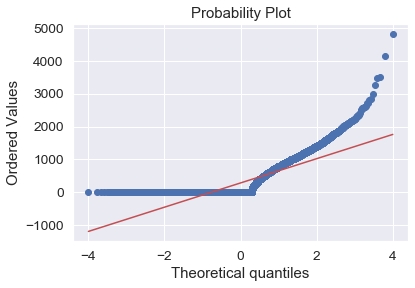

In [127]:
# histogram and normal probability plot for sqft_basement
sns.distplot(df_housedata['sqft_basement'],fit=norm);
fig=plt.figure()
res=stats.probplot(df_housedata['sqft_basement'],plot=plt)